### Statistical distributions

In [27]:
import numpy as np
from scipy.stats import uniform, bernoulli, binom, norm, expon, poisson, t

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(5,5)})

#### 1. Uniform distribution

A [uniform distribution](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) is a distribution that has constant probability. 

The probability distribution function (PDF) of the continuous uniform distribution is:
$$
f(x) =  \begin{cases} 
      0 & x < a \\
      \frac{1}{b-a} & a\leq x\leq b \\
      0 & x > b
   \end{cases}
$$

And the cumulative distribution function (CDF) is:
$$
F(x) =  \begin{cases} 
      0 & x < a \\
      \frac{x-a}{b-a} & a\leq x\leq b \\
      0 & x > b
   \end{cases}
$$

In [10]:
n = 100000   # n. of samples
start = 1    # a
width = 20   # b = start + width
data_uniform = uniform.rvs(size=n, loc=start, scale=width) # rvs = random variates

In [11]:
uniform.rvs?

In [12]:
data_uniform.shape

(100000,)

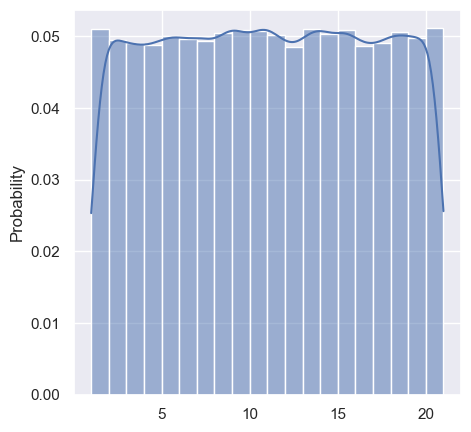

In [15]:
sns.histplot(data_uniform, bins=20, kde=True, stat='probability');  # P(x) = 1/21 ~= 0.05

#### 2. Bernoulli Distribution

A [Bernoulli distribution](https://en.wikipedia.org/wiki/Bernoulli_distribution) has only two possible outcomes, namely 1 (success) and 0 (failure), and a single trial, for example, a coin toss. 

The PDF of the continuous Bernoulli distribution is:
$$
f(k;p) = p^k (1-p)^{1-k} \space \text{for} \space k \in \{0,1\}
$$

And the CDF is:
$$
F(k;p) =  \begin{cases} 
      0 & k < 0 \\
      1-p & 0\leq k< 1 \\
      1 & k \geq b
   \end{cases}
$$

In [16]:
data_bern = bernoulli.rvs(size=10000,p=0.4)

In [17]:
data_bern.shape

(10000,)

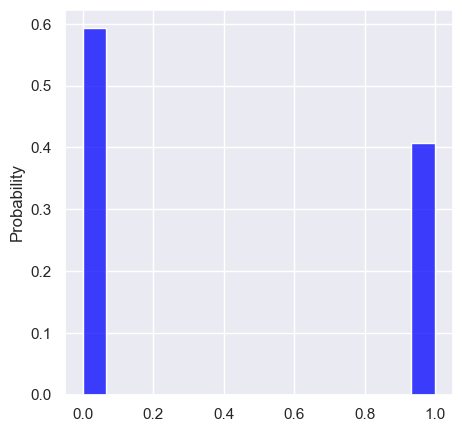

In [20]:
sns.histplot(data_bern, kde=False, color="blue", stat='probability');

#### 3. Binomial Distribution

The [Binomial distribution](https://en.wikipedia.org/wiki/Binomial_distribution) is very similar to the Bernoulli distribution, but here the outcomes need not be equally likely, and each trial is independent of each other.

The PDF of the Binomial distribution is:
$$
f(k,n,p) = \binom{n}{k}p^k(1-p)^{n-k}
$$

where:
$$
\binom{n}{k} = \frac{n!}{k!(n-k)!}
$$

The CDF doesn't have an easy analytical expression.

In [22]:
data_binom = binom.rvs(n=10,p=0.6,size=10000)

In [23]:
data_binom.shape

(10000,)

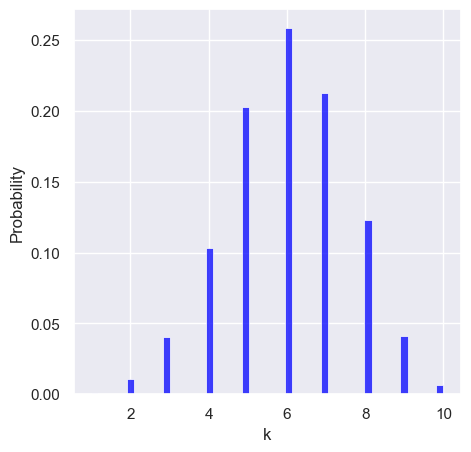

In [29]:
sns.histplot(data_binom, kde=False, color='blue', stat='probability')
plt.xlabel('k');

#### 4. Normal distribution

The [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is also called Gaussian distribution or bell curve. 

The PDF of a normal density curve with mean $\mu$ and standard deviation $\sigma$ at a given point $x$ is given by:

$$
f(x|\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x - \mu)^{2}}{2\sigma^{2}}}
$$

The CDF is:
$$
\Phi(x) = \frac 1 {\sqrt{2\pi}} \int_{-\infty}^x e^{-t^2/2}
$$

In [30]:
data_normal = norm.rvs(size=10000, loc=0, scale=1)

In [31]:
data_normal.shape

(10000,)

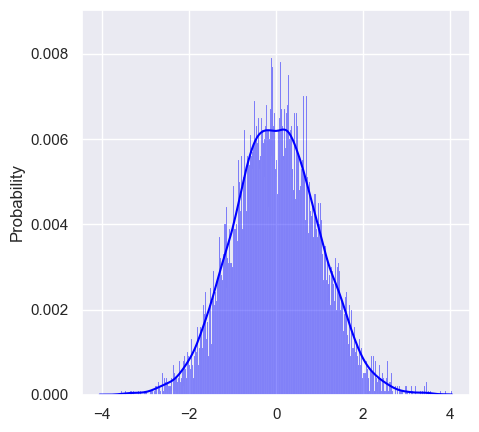

In [36]:
sns.histplot(data_normal, bins=500, kde=True, color='blue', stat='probability');

#### 5. Exponential distribution

The [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) describes the time between events in a Poisson point process, i.e., a process in which events occur continuously and independently at a constant average rate.

The PDF is:
$$
f(x) = \frac{1} {\beta} e^{-\frac{x - \mu}{\beta}}\,\,
x \ge \mu;\,\beta > 0
$$

where $\mu$ is the location parameter and $\beta$ is the scale parameter (the scale parameter is often referred to as $\lambda$ which equals 1/$\beta$). If we use $\lambda$ insted of $\beta$ the equation is as follows:
$$
f(x; \lambda) = \lambda e^{-\lambda x}
$$

The CDF is:
$$
F(x) =  
   \begin{cases} 
      0 & k < 0 \\
      1 - e^{-\lambda x} & x \geq 0
   \end{cases}
$$

In [37]:
data_expon = expon.rvs(scale=1, loc=0, size=10000)

In [38]:
data_expon.shape

(10000,)

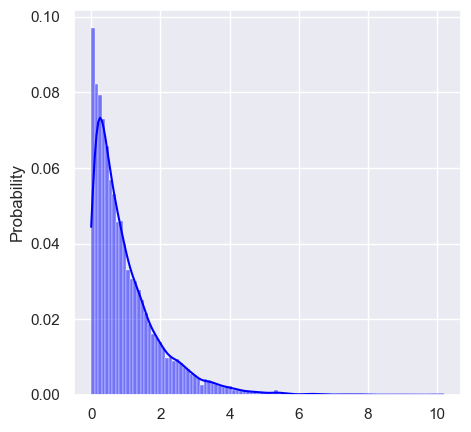

In [40]:
sns.histplot(data_expon, kde=True, bins=100, color='blue', stat='probability');

#### 6. Poisson Distribution

The [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution) is used to model the number of events occurring within a given time interval.

The formula for the Poisson PDF is:
$$
p(x;\lambda) = \frac{e^{-\lambda}\lambda^{k}} {k!} \mbox{    for     } 
k = 0, 1, 2, \dots
$$

The CDF doesn't have any easy analytical expression.

In [41]:
data_poisson = poisson.rvs(mu=3, size=10000)

In [42]:
data_poisson.shape

(10000,)

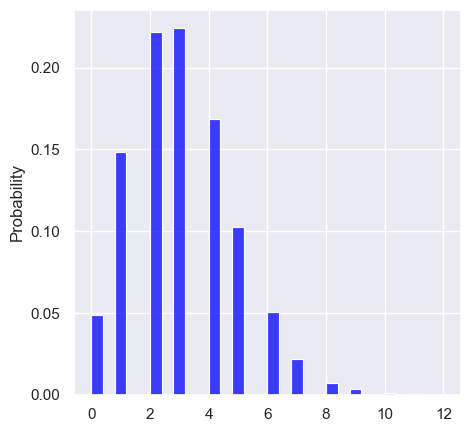

In [48]:
sns.histplot(data_poisson, bins=30, kde=False, color='blue', stat='probability');

#### 7. Student's t-Distribution

The [Student's t-distribution](https://en.wikipedia.org/wiki/Student%27s_t-distribution) is a widely used distribution in hypothesis testing.

A t-distribution describes samples drawn from a full population that follows a normal distribution. The larger the sample of the t-distribution, the more the t-distribution resembles a normal distribution.

When using this distribution we have a parameter that we didn't use for the other distributions. The degrees of freedom or df, can be defined as the number of values in a calculation that are free to vary without violating the result of the calculation.

The formula for the PDF of the t-distribution is
$$
f(x) = \frac{(1 + \frac{x^2}{\nu})^{\frac{-(\nu + 1)} {2}}}
{B(0.5,0.5\nu)\cdot\sqrt{\nu}}
$$

where B is the beta function and $\nu$ is a positive integer shape parameter. The formula for the beta function is

$$
B(\alpha,\beta) = \int_{0}^{1} {t^{\alpha-1}(1-t)^{\beta-1}dt}
$$

The CDF has an analytical expression but it's useless to report it here.

In [49]:
data_t = t(df=20, loc=0, scale=1)

In [51]:
data_t

That's not what we expected. What if we use the "rvs"?

In [52]:
data_t = t.rvs(df=20, loc=0, scale=1)

In [53]:
data_t

1.016741423857012

Again, this is not what we want. The thing here is that we have a freezing at just one point. To have a whole distribution this is what we do:

In [54]:
rv = t(df=20, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 10000)
data_t = rv.pdf(x) 

In [61]:
data_t

array([0.0002328 , 0.0002333 , 0.00023379, ..., 0.00023379, 0.0002333 ,
       0.0002328 ])

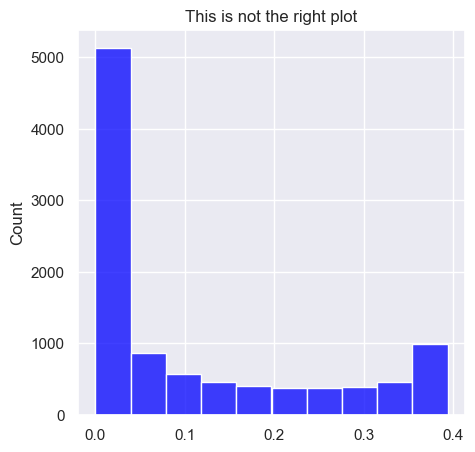

In [58]:
# This is not right
sns.histplot(data_t, bins=10, kde=False, color='blue')
plt.title('This is not the right plot');

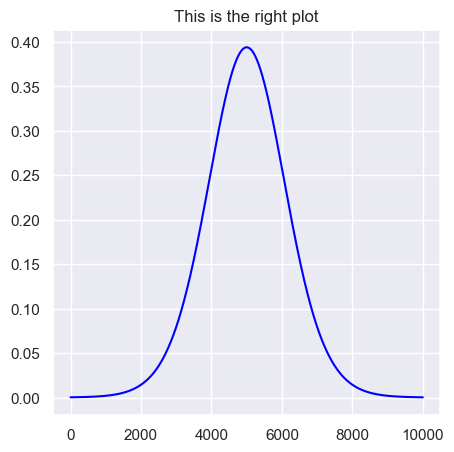

In [65]:
# Tis is the right plot
sns.lineplot(data_t, color="blue")
plt.title('This is the right plot');